In [188]:
import numpy as np 
import matplotlib.pyplot as plt

In [189]:
# File 
file = "points.txt"

In [190]:
# Read txt file and create list of points
f = open(file, "r")
s = f.read().split("\n")
points = [[float(y) for y in x.strip().split(" ")] for x in s]

In [191]:
# Get list of vertices for each polygon
P = np.array([tuple(x) for x in zip(points[0], points[1])])
Q = np.array([tuple(x) for x in zip(points[2], points[3])])

In [192]:
def sort_coordinates(list_of_xy_coords):
    cx, cy = list_of_xy_coords.mean(0)
    x, y = list_of_xy_coords.T
    angles = np.arctan2(x-cx, y-cy)
    indices = np.argsort(angles)
    return list_of_xy_coords[indices]

In [193]:
# Sort vertices in clockwise order (done in linear time)
P = sort_coordinates(P)
Q = sort_coordinates(Q)

In [194]:
def absolute_value(x):
    return x[0] ** 2 + x[1] ** 2

In [195]:
# Find maximum y-coordinate for each polygon 
i = np.argmax([x[1] for x in P])
j = np.argmax([x[1] for x in Q])

# Draw a vertical line
v = [1, 0]

print(P[i], Q[j])

[0. 1.] [1. 0.]


In [196]:
rotation = 0
bridges = []

In [197]:
while rotation < 2 * np.pi:
    # Calculate vector on the edge of P between p_i and p_i+1
    i_next = (i + 1) % len(P)
    pi = P[i]
    pi_next = P[i_next]
    p_vec = [pi_next[0] - pi[0], pi_next[1] - pi[1]]
    
    # Calculate vector on the edge of Q between q_j and q_j+1
    j_next = (j + 1) % len(Q)
    qj = Q[j]
    qj_next = Q[j_next]
    q_vec = [qj_next[0] - qj[0], qj_next[1] - qj[1]]

    # Find minimum angle between vertical line and p_vec / q_vec
    theta_P = np.arccos(np.dot(v, p_vec) / ((absolute_value(v)**(1/2)) * (absolute_value(p_vec)**(1/2))))
    theta_Q = np.arccos(np.dot(v, q_vec) / ((absolute_value(v)**(1/2)) * (absolute_value(q_vec)**(1/2))))


    if theta_P < theta_Q:
        # Consider points pi = p1 and qj = q and points p_i-1, p_i+1, q_j-1, q_j+1.
        i = i_next
        # Rotate the vertical line by theta_P
        rotation += theta_P
        v = [v[0] * np.cos(theta_P) + v[1] * np.sin(theta_P), - v[0] * np.sin(theta_P) + v[1] * np.cos(theta_P)]
        
    elif theta_P > theta_Q:
        # Consider points pi = p and qj = q
        j = j_next
        # Rotate the vertical line by theta_Q
        rotation += theta_Q
        v = [v[0] * np.cos(theta_Q) + v[1] * np.sin(theta_Q), - v[0] * np.sin(theta_Q) + v[1] * np.cos(theta_Q)]

    else: # theta_P == theta_Q
        i = i_next
        j = j_next
        rotation += theta_P
        v = [v[0] * np.cos(theta_P) + v[1] * np.sin(theta_P), - v[0] * np.sin(theta_P) + v[1] * np.cos(theta_P)]


    if theta_P != theta_Q:
        qj = Q[j]
        pi = P[i]
        print("non parallel!")
        print(pi, qj)
        line = [pi[0] - qj[0], pi[1] - qj[1]]
        c1 = np.sign(np.cross(line, [pi[0] - P[(i - 1) % len(P)][0], pi[1] - P[(i - 1) % len(P)][1]]))
        c2 = np.sign(np.cross(line, [pi[0] - P[(i + 1) % len(P)][0], pi[1] - P[(i + 1) % len(P)][1]]))
        c3 = np.sign(np.cross(line, [pi[0] - Q[(j - 1) % len(Q)][0], pi[1] - Q[(j - 1) % len(Q)][1]]))
        c4 = np.sign(np.cross(line, [pi[0] - Q[(j + 1) % len(Q)][0], pi[1] - Q[(j + 1) % len(Q)][1]]))

        if len(set([c1, c2, c3, c4])) == 1:
            bridges += [(pi, qj)]

    else: # parallel edges!
        # We have to consider lines [p_i, q_i-1], [p_i-1, q_i], [p_i-1, q_i-1], [p_i, q_i]
        qj = Q[j]
        pi = P[i]
        print("parallel!")
        print(pi, qj)
        q_prev = Q[(j - 1) % len(Q)]
        p_prev = P[(i - 1) % len(P)]
        q_next = Q[(j + 1) % len(Q)]
        p_next = P[(i + 1) % len(P)]

        # Line through p_i and q_i-1
        line1 = [pi[0] - q_prev[0], pi[1] - q_prev[1]]
        c1 = np.sign(np.cross(line1, [pi[0] - p_prev[0], pi[1] - p_prev[1]]))
        c2 = np.sign(np.cross(line1, [pi[0] - p_next[0], pi[1] - p_next[1]]))
        c3 = np.sign(np.cross(line1, [pi[0] - Q[(j - 2) % len(Q)][0], pi[1] - Q[(j - 2) % len(Q)][1]]))
        c4 = np.sign(np.cross(line1, [pi[0] - qj[0], pi[1] - qj[1]]))
        if len(set([c1, c2, c3, c4])) == 1:
            print("Added: (pi, q_prev) ", (pi, q_prev))
            bridges += [(pi, q_prev)]
        
        # Line through p_i-1 and q_i
        line2 = [p_prev[0] - qj[0], p_prev[1] - qj[1]]
        c1 = np.sign(np.cross(line2, [p_prev[0] - P[(i - 2) % len(P)][0], p_prev[1] - P[(i - 2) % len(P)][1]]))
        c2 = np.sign(np.cross(line2, [p_prev[0] - pi[0], p_prev[1] - pi[1]]))
        c3 = np.sign(np.cross(line2, [p_prev[0] - q_prev[0], p_prev[1] - q_prev[1]]))
        c4 = np.sign(np.cross(line2, [p_prev[0] - q_next[0], p_prev[1] - q_next[1]]))
        if len(set([c1, c2, c3, c4])) == 1:
            print("Added: (p_prev, qj) ", (p_prev, qj))
            bridges += [(p_prev, qj)]

        # Line through p_i-1 and q_i-1
        line3 = [p_prev[0] - q_prev[0], p_prev[1] - q_prev[1]]
        c1 = np.sign(np.cross(line3, [p_prev[0] - P[(i - 2) % len(P)][0], p_prev[1] - P[(i - 2) % len(P)][1]]))
        c2 = np.sign(np.cross(line3, [p_prev[0] - pi[0], p_prev[1] - pi[1]]))
        c3 = np.sign(np.cross(line3, [p_prev[0] - Q[(j - 2) % len(Q)][0], p_prev[1] - Q[(j - 2) % len(Q)][1]]))
        c4 = np.sign(np.cross(line3, [p_prev[0] - qj[0], p_prev[1] - qj[1]]))
        if len(set([c1, c2, c3, c4])) == 1:
            print("Added: (p_prev, q_prev) ", (p_prev, q_prev))
            bridges += [(p_prev, q_prev)]

        line4 = [pi[0] - qj[0], pi[1] - qj[1]]
        c1 = np.sign(np.cross(line4, [pi[0] - p_prev[0], pi[1] - p_prev[1]]))
        c2 = np.sign(np.cross(line4, [pi[0] - p_next[0], pi[1] - p_next[1]]))
        c3 = np.sign(np.cross(line4, [pi[0] - q_prev[0], pi[1] - q_prev[1]]))
        c4 = np.sign(np.cross(line4, [pi[0] - q_next[0], pi[1] - q_next[1]]))
        if len(set([c1, c2, c3, c4])) == 1:
            print("Added: (pi, qj) ", (pi, qj))
            bridges += [(pi, qj)]
        

parallel!
[2. 1.] [3. 0.]
Added: (pi, qj)  (array([2., 1.]), array([3., 0.]))
parallel!
[1. 0.] [ 2. -1.]
Added: (p_prev, q_prev)  (array([2., 1.]), array([3., 0.]))
parallel!
[0. 0.] [ 1. -1.]
Added: (pi, qj)  (array([0., 0.]), array([ 1., -1.]))
parallel!
[0. 1.] [1. 0.]
Added: (p_prev, q_prev)  (array([0., 0.]), array([ 1., -1.]))
parallel!
[2. 1.] [3. 0.]
Added: (pi, qj)  (array([2., 1.]), array([3., 0.]))


In [198]:
bridges_aux = [(list(pair[0]), list(pair[1])) for pair in bridges]

bridges = []
for b in bridges_aux:
    if b not in bridges:
        bridges += [b]

In [211]:
[list(x) for x in bridges]

[[[2.0, 1.0], [3.0, 0.0]], [[0.0, 0.0], [1.0, -1.0]]]

In [209]:
[tuple(x) for x in list(np.concatenate(bridges))]

[(2.0, 1.0), (3.0, 0.0), (0.0, 0.0), (1.0, -1.0)]

In [201]:
P = [tuple(x) for x in list(P)]
Q = [tuple(x) for x in list(Q)]

In [202]:
bridge_points = [tuple(x) for x in list(np.concatenate(bridges))]
hull = []
case = ""

i = np.argmax([x[1] for x in P])
j = np.argmax([x[1] for x in Q])

if P[i][1] > Q[j][1]:
    start = P[i]
    hull += [start]
    case = "P"
    start_case = "P"
    i = (i + 1) % len(P)
else:
    start = Q[j]
    hull += [start]
    case = "Q"
    start_case = "Q"
    i = j
    i = (i + 1) % len(Q)

In [203]:
def create_hull(i, hull, P, Q, start, case, on_bridge = False):
    if case == "P":
        if P[i] == start:
            return hull
        elif P[i] not in bridge_points or on_bridge == True:
            hull += [P[i]]
            i = (i + 1) % len(P)
            return create_hull(i, hull, P, Q, start, "P", False)
        else: # P[i] in bridge_points:
            hull += [P[i]]
            index = bridge_points.index(P[i])
            q = bridge_points[(index + 1) % len(bridge_points)]
            i = Q.index(q)
            return create_hull(i, hull, P, Q, start, "Q", True)
        
    else: # case == "Q":
        if Q[i] == start:
            return hull
        elif Q[i] not in bridge_points or on_bridge == True:
            hull += [Q[i]]
            i = (i + 1) % len(Q)
            return create_hull(i, hull,P, Q, start, "Q", False)
        else: # Q[i] in bridge_points:
            hull += [Q[i]]
            index = bridge_points.index(Q[i])
            p = bridge_points[(index - 1) % len(bridge_points)]
            i = P.index(p)
            return create_hull(i, hull, P, Q, start, "P", True)

In [204]:
hull = create_hull(i, hull, P, Q, start, case)
hull

[(0.0, 1.0), (2.0, 1.0), (3.0, 0.0), (2.0, -1.0), (1.0, -1.0), (0.0, 0.0)]

In [205]:
hull_x = [x[0] for x in hull]
x_line = " ".join([str(int(x)) if x.is_integer() else x for x in hull_x])
hull_y = [x[0] for x in hull]
y_line = " ".join([str(int(x)) if x.is_integer() else x for x in hull_y])

to_write = x_line + "\n" + y_line
to_write

'0 2 3 2 1 0\n0 2 3 2 1 0'

In [206]:
f = open("output.txt", "w+")
f.write(to_write)
f.close()

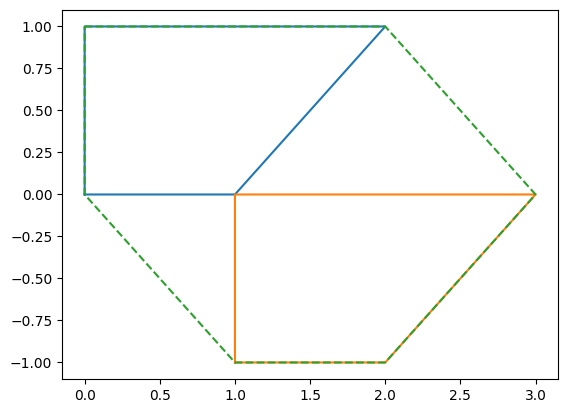

In [207]:
# Plot both P and Q and the convex hull of their union
plt.plot([x[0] for x in P] + [P[0][0]], [x[1] for x in P] + [P[0][1]])
plt.plot([x[0] for x in Q] + [Q[0][0]], [x[1] for x in Q] + [Q[0][1]])
plt.plot([x[0] for x in hull] + [hull[0][0]], [x[1] for x in hull] + [hull[0][1]], linestyle='dashed')

In [215]:
[(P[i], P[i+1]) for i in range(len(P) - 1)] + [(P[-1], P[0])]

[((0.0, 0.0), (0.0, 1.0)),
 ((0.0, 1.0), (2.0, 1.0)),
 ((2.0, 1.0), (1.0, 0.0)),
 ((1.0, 0.0), (0.0, 0.0))]